# WB-XIC, Lab2: Wstęp do sieci neuronowych i PyTorch

Wymagania: Python, NumPy, Jupyter Notebook

Bazując na [Dive into Deep Learning](https://d2l.ai/index.html)

PyTorch:
- https://pytorch.org
- https://github.com/pytorch/pytorch

## Wstęp

In [1]:
# pip install torch
import torch
import numpy as np

In [2]:
# np.arange(10, dtype=np.float32)
x = torch.arange(10, dtype=torch.float32)
x

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [3]:
x.shape

torch.Size([10])

In [4]:
x.numel()

10

In [5]:
x.reshape(5, 2)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [6]:
x.reshape(5, 2).numel()

10

In [7]:
torch.zeros((1, 2))

tensor([[0., 0.]])

In [8]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
torch.randn(5)

tensor([ 0.5865, -0.4146, -0.7298, -0.0312,  1.1866])

In [10]:
torch.randint(10, 5) # ?

TypeError: randint(): argument 'size' (position 2) must be tuple of ints, not int

In [11]:
# 1.
a = torch.tensor([1, 2, 3])
# 2.
b = torch.from_numpy(np.array([2, 3, 4]))

In [12]:
a + b 

tensor([3, 5, 7])

### Zadanie 1.
1. stworzyć poziomy wektor `x` z 4 unikalnymi wartościami całkowitymi
2. stworzyć macierz `X` składającą się z wierszy: wszystkich możliwych permutacji wektora `x`
3. stworzyć pionowy wektor `w` z 4 wartościami z rozkładu normalnego
4. pomnożyć macierzowo `X*w`
5. znaleźć indeksy dla maksimum i minimum wierszy

In [13]:
torch.manual_seed(1234)
np.random.seed(1234)

In [14]:
x = torch.from_numpy(np.random.choice(10, 4))

In [15]:
x

tensor([3, 6, 5, 4], dtype=torch.int32)

In [16]:
from itertools import permutations
X = torch.tensor(list(permutations(x)), dtype=torch.float32)

In [17]:
X.shape

torch.Size([24, 4])

In [18]:
w = torch.randn((4, 1))

In [19]:
torch.mm(X, w)

tensor([[-1.6379],
        [-0.4096],
        [-3.0518],
        [-0.5953],
        [-3.2375],
        [-2.0092],
        [-2.7067],
        [-1.4784],
        [ 0.1212],
        [-1.1071],
        [-0.0645],
        [-2.5210],
        [-3.7644],
        [-1.3078],
        [ 0.4774],
        [-0.7508],
        [ 0.1061],
        [-3.5787],
        [-3.5938],
        [-2.3655],
        [ 0.6480],
        [-1.8085],
        [ 0.4624],
        [-3.2224]])

In [20]:
torch.mv(X, w.reshape(-1, )).min()

tensor(-3.7644)

In [21]:
torch.mv(X, w.reshape(-1, )).amin(keepdim=True)

tensor([-3.7644])

In [22]:
torch.mm(X, w).argmin()

tensor(12)

## [Pochodna i różniczkowanie](https://d2l.ai/chapter_preliminaries/calculus.html#derivatives-and-differentiation)

In [23]:
def f(x):
    return x ** 2 - 2 * x

In [24]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [25]:
h = 1
for i in range(5):
    print(f'x = {1}, h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

x = 1, h=1.00000, numerical limit=1.00000
x = 1, h=0.10000, numerical limit=0.10000
x = 1, h=0.01000, numerical limit=0.01000
x = 1, h=0.00100, numerical limit=0.00100
x = 1, h=0.00010, numerical limit=0.00010


Wynik: https://www.wolframalpha.com/input?i=x+**+2+-+2+*+x

### Zadanie 2.

`y_hat = torch.mm(X, w)` (z Zadania 1.) 
1. stworzyć pionowy wektor `y` poprzez dodanie szumu z rozkładu normalnego do `y_hat`
2. policzyć średni błąd kwadratowy [`MSE(y, y_hat)`](https://pl.wikipedia.org/wiki/B%C5%82%C4%85d_%C5%9Bredniokwadratowy)
3. napisać wzór na pochodną `MSE` względem `w` (teoretycznie, w markdown)
4. policzyć pochodną `MSE` po `w`

In [26]:
y = torch.mm(X, w) + torch.randn(24, 1)*2
y_temp = torch.mm(X, w)

In [27]:
((y - torch.mm(X, w)) ** 2).mean().item()

3.767782211303711

https://d2l.ai/chapter_linear-networks/linear-regression.html

`MSE = [(y - (X*w)) ** 2] / N`

`dMSE / dw = [-2X * (y - (X*w))] / N`

In [29]:
dMSE = torch.mm(2*X.T, torch.mm(X, w) - y) / X.shape[0]

In [30]:
w

tensor([[ 0.0461],
        [ 0.4024],
        [-1.0115],
        [ 0.2167]])

In [31]:
dMSE

tensor([[6.1564],
        [4.9965],
        [6.2760],
        [5.4380]])

**Uwaga!** Wyraz wolny, bias - `b` -> [szczegóły](https://d2l.ai/chapter_linear-networks/linear-regression.html)

## Gradient descent na przykładzie regresji liniowej

### Zadanie 3.

Spróbuj zaimplementować poniższy pseudokod.

In [32]:
learning_rate = 0.001
epochs = 100
for i in range(epochs):
    # 1. policz gradient MSE
    # 2. zaktualizuj wagi wykorzystując gradient i learning_rate
    pass
# 3. policz MSE

In [33]:
lr = 0.001
epochs = 100
losses = []
for i in range(epochs):
    losses += [((y - torch.mm(X, w)) ** 2).mean().item()]
    dw = torch.mm(2*X.T, torch.mm(X, w) - y) / X.shape[0]
    w = w - lr * dw

In [34]:
w

tensor([[-0.0266],
        [ 0.4284],
        [-1.0944],
        [ 0.2052]])

In [35]:
((y - torch.mm(X, w)) ** 2).mean().item() # wow działa

3.2837467193603516

In [36]:
torch.column_stack((y, torch.mm(X, w)))

tensor([[-2.2666, -2.1606],
        [-1.4022, -0.8610],
        [-2.8048, -3.6835],
        [-0.8972, -1.0842],
        [-6.0159, -3.9067],
        [-3.2507, -2.6071],
        [-2.7550, -3.5257],
        [-3.5589, -2.2261],
        [-2.8686, -0.4800],
        [ 0.6548, -1.7796],
        [-2.4218, -0.7032],
        [-4.3890, -3.3025],
        [-4.8995, -4.5936],
        [-1.8623, -1.9943],
        [-3.8894, -0.0249],
        [-0.0172, -1.3245],
        [ 1.9822, -0.4714],
        [-3.5631, -4.3703],
        [-4.2215, -4.3618],
        [-4.6789, -3.0622],
        [ 4.3298,  0.2069],
        [-3.8434, -2.3924],
        [ 2.9009, -0.0164],
        [-2.9022, -3.9153]])

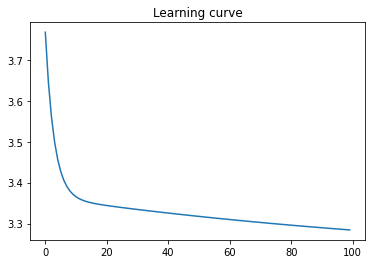

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(100), losses)
plt.title("Learning curve")
plt.show()

**Uwaga!** Wyraz wolny, bias - `b` -> [szczegóły](https://d2l.ai/chapter_linear-networks/linear-regression.html)

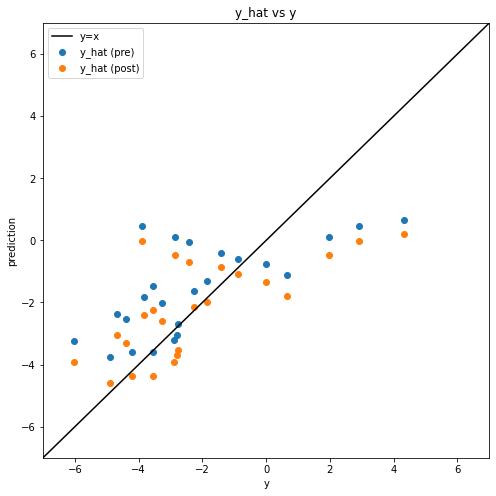

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(y, y_temp)
plt.title("Pre and post gradient descent")
plt.scatter(y, torch.mm(X, w))
plt.title("y_hat vs y")
plt.ylim((-7, 7))
plt.ylabel("prediction")
plt.xlim((-7, 7))
plt.plot(np.arange(-7, 8), np.arange(-7, 8), c="black")
plt.xlabel("y")
plt.legend(("y=x", "y_hat (pre)", "y_hat (post)"))
plt.show()

## Klasyfikacja

Główna różnica w klasyfikacji to dodanie nowego wymiaru - klasy (np. `3` dla danych iris, `10` dla MNIST):
1. wektor `y` w klasyfikacji binarnej ma dwa wymiary `(N, 2)`
2. wektor `y_hat` musi być normalizowany - prawdopodobieństwa przynależności do klas sumują się do 1 wykorzystując [SoftMax](https://d2l.ai/chapter_linear-networks/softmax-regression-concise.html#softmax-implementation-revisited)
3. stosujemy funkcję straty Cross entropy zamiast MSE; zmienia się sposób liczenia pochodnej

In [39]:
torch.manual_seed(7)
np.random.seed(7)

In [40]:
num_inputs = 3
X = np.random.normal(size=(100, num_inputs))
y = (X.sum(axis=1) > 0).astype(np.int)
Y = np.column_stack((y, 1- y))
num_outputs = Y.shape[1]
X = torch.as_tensor(X, dtype=torch.float32)
Y = torch.as_tensor(Y, dtype=torch.float32)

In [41]:
# requires_grad - informujemy o zaalokowaniu dodatkowej pamięci na gradient
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [42]:
W

tensor([[-0.0015,  0.0079],
        [ 0.0095, -0.0111],
        [ 0.0169, -0.0089]], requires_grad=True)

In [43]:
torch.mm(X, W)

tensor([[-0.0063,  0.0182],
        [-0.0080,  0.0120],
        [ 0.0006,  0.0104],
        [-0.0097,  0.0132],
        [-0.0073,  0.0091],
        [ 0.0095, -0.0187],
        [ 0.0131,  0.0044],
        [ 0.0304, -0.0126],
        [-0.0205,  0.0194],
        [ 0.0063, -0.0260],
        [-0.0167, -0.0030],
        [-0.0315,  0.0331],
        [ 0.0455, -0.0416],
        [ 0.0054, -0.0103],
        [-0.0368,  0.0281],
        [ 0.0443, -0.0386],
        [ 0.0270, -0.0091],
        [ 0.0049, -0.0015],
        [-0.0270,  0.0152],
        [ 0.0185, -0.0057],
        [-0.0192,  0.0192],
        [-0.0212,  0.0256],
        [-0.0133,  0.0050],
        [ 0.0111, -0.0234],
        [ 0.0389, -0.0286],
        [ 0.0159, -0.0119],
        [-0.0055,  0.0124],
        [-0.0130,  0.0107],
        [-0.0104,  0.0077],
        [ 0.0239, -0.0128],
        [ 0.0054, -0.0031],
        [-0.0072,  0.0074],
        [-0.0009,  0.0111],
        [-0.0012,  0.0026],
        [-0.0060,  0.0148],
        [ 0.0170, -0

In [44]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [45]:
def neural_network(X):
    # w tym przypadku architektura odpowiada regresji logistycznej
    return softmax(torch.mm(X.reshape((-1, W.shape[0])), W) + b)

In [46]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

In [47]:
optimizer = torch.optim.SGD({W, b}, lr=0.001)
errors = []

for i in range(100):
    y_hat = neural_network(X)
    errors += [np.abs((torch.as_tensor(y) - y_hat.argmax(1)).numpy()).mean()]
    l = cross_entropy(y_hat, y)
    optimizer.zero_grad()
    l.mean().backward()
    optimizer.step()

In [48]:
np.abs((torch.as_tensor(y) - y_hat.argmax(1)).numpy()).mean() # error = 1 - accuracy

0.12

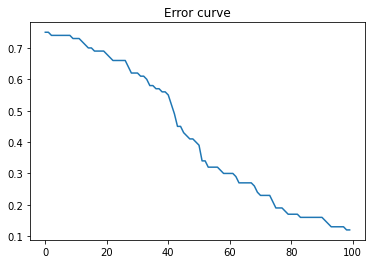

In [49]:
plt.plot(range(100), errors)
plt.title("Error curve")
plt.show()

In [50]:
torch.as_tensor(y) - y_hat.argmax(1)

tensor([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0, -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  1,  0,  0])

In [51]:
W

tensor([[-0.0154,  0.0218],
        [-0.0107,  0.0090],
        [-0.0087,  0.0167]], requires_grad=True)

In [52]:
b

tensor([ 2.5413e-06, -2.5412e-06], requires_grad=True)

*policzyć macierz pomyłek klasyfikacji binarnej

# Praca Domowa 1

Indywidualnie, zaimplementować model sieci neuronowej (MLP) do klasyfikacji w `torch` i przetestować go na dwóch zbiorach danych: XOR (wygenerować), oraz iris (pobrać). Powstały raport w formatach `.ipynb` oraz `.html` powinien zawierać wionski z przeprowadzonej analizy.
1. do 2 punktów uzyskuje się za skuteczność klasyfikacji modeli i wizualizację procesu uczenia
2. do 2 punktów uzyskuje się za analizę porównawczą różnych architektur sieci neuronowych (liczby neuronów i warstw)
3. 1 punkt uzyskuje się za analizę porównawczą różnych wartości `learning_rate` 
4. 1 punkt uzyskuje się za wytrenowanie skutecznego modelu na zbiorze danych MNIST i analizę macierzy pomyłek tej klasyfikacji
5. 1 punkt uzyskuje się za ewaluowanie powyższych zjawisk na podzbiorze treningowym i testowym (analizę zjawiska przeuczenia)
6. 1 punkt uzyskuje się za animację zmiany granic decyzyjnych klasyfikacji podczas uczenia (na wybranym zbiorze danych)
7. do 2 punktów uzyskuje sie za jakość raportu (opisu, wizualizacji, kodu).

**Uwaga!** Warto zacząć od uczenia bardzo małych sieci i stopniowo zwiększać ich skomplikowanie.

Deadline: 16 marca 23:59. Na zajęciach 17 marca 5 wybranch osób krótko zaprezentuje swoje wyniki.

Pracę zgłaszamy poprzez PR o tytule `[PD1] Imię Nazwisko` do folderu `homeworks/pd1/imię_nazwisko`.